In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils
import math
import matplotlib.patches as patches
import time

In [2]:
import importlib  

module = importlib.import_module('1) detect_roi')
detect_roi = module.detect_roi

module = importlib.import_module('2) rotate_image_boundingBox')
rotate_image_boundingBox = module.rotate_image_boundingBox

module = importlib.import_module('3) fix_horizontalBars_case')
fix_horizontalBars_case = module.fix_horizontalBars_case

module = importlib.import_module('4) compute_barcode_structure')
compute_barcode_structure = module.compute_barcode_structure

module = importlib.import_module('5) find_wrong_bar')
find_wrong_bar = module.find_wrong_bar

In [3]:
from os import listdir
from os.path import isfile, join
images_paths = [f for f in listdir('../images') if isfile(join('../images', f))]

In [4]:
def sort_bb_points_for_visualization(bb_points_sorted):
    """Function which sorts the bb points differently, for making the bb compliant with the visualization API"""
    bb_rot = bb_points_sorted.copy()
    bb_rot[2, :] = bb_points_sorted[3, :]
    bb_rot[3, :] = bb_points_sorted[2, :]
    return bb_rot.astype(int)

In [5]:
def refine_roi(image_path, visualize=True):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bb_points_sorted, bb_width, bb_height = detect_roi(image, visualize_bounding_box=False)
    image_rot, bb_points_sorted_rot = rotate_image_boundingBox(image, bb_points_sorted, bb_width, bb_height, 
                                                           visualize_rot_image_bb=False)
    image_rot, bb_points_sorted_rot, bb_width, bb_height = fix_horizontalBars_case(image_rot, bb_points_sorted_rot, bb_width, 
                                                                               bb_height, visualize_fixed_image_bb=False)
    gray_rot = cv2.cvtColor(image_rot, cv2.COLOR_BGR2GRAY)
    roi_image = gray_rot[int(bb_points_sorted_rot[0][1]):int(bb_points_sorted_rot[0][1]+bb_height), 
                             int(bb_points_sorted_rot[0][0]):int(bb_points_sorted_rot[0][0]+bb_width)]
    bars_start, bars_width, bars_halfHeightUp, bars_halfHeightDown = compute_barcode_structure(roi_image, bb_width, bb_height,
                                                                                           algorithm=1, verbose=False, 
                                                                                           visualize_refined_bb=False,
                                                                                           visualize_barcode_structure=False)
    wrong_bar_index = find_wrong_bar(bars_start, bars_width, bars_halfHeightUp, bars_halfHeightDown, level=0.02)
    if wrong_bar_index is not None:
        del bars_start[wrong_bar_index]
        del bars_width[wrong_bar_index]
        del bars_halfHeightUp[wrong_bar_index]
        del bars_halfHeightDown[wrong_bar_index]
    
    first_bar_x = min(bars_start)
    last_bar_x = max([s+w for s,w in zip(bars_start,bars_width)])-1
    X = min(bars_width)
    min_half_height_up = min(bars_halfHeightUp)
    min_half_height_down = min(bars_halfHeightDown)

    half_height = math.ceil(bb_height/2)
    
    bb_points_sorted_rot_ref = bb_points_sorted_rot.copy()
    bb_points_sorted_rot_ref[[0,2],0] = bb_points_sorted_rot[[0,2],0] - (10*X-first_bar_x) 
    bb_points_sorted_rot_ref[[1,3],0] = bb_points_sorted_rot[[1,3],0] + (10*X-(bb_width-last_bar_x-1))
    roi_image_ref = gray_rot[int(bb_points_sorted_rot_ref[0][1]):int(bb_points_sorted_rot_ref[2][1])+1, int(bb_points_sorted_rot_ref[0][0]):int(bb_points_sorted_rot_ref[1][0])+1]
    roi_image_ref = roi_image_ref[half_height-min_half_height_up-1:half_height+min_half_height_down-1+1,:]
    new_bb_height, new_bb_width  = roi_image_ref.shape
    new_half_height = math.ceil(new_bb_height/2)
    
    if visualize:
        roi_image_ref_show = gray_rot[int(bb_points_sorted_rot_ref[0][1]):int(bb_points_sorted_rot_ref[2][1])+1, int(bb_points_sorted_rot_ref[0][0]):int(bb_points_sorted_rot_ref[1][0])+1].copy()
        plt.figure()
        plt.imshow(roi_image_ref_show, 'gray')
        #plt.vlines([10*X,-10*X], ymin=0, ymax=new_bb_height,  label='10*X')
        plt.axvline(10*X, c='orange', label='10*X')
        plt.axvline(new_bb_width-10*X-1, c='red', label='-10*X')
        plt.axhline(half_height-min_half_height_up-1, c='green', label='Min up height')
        plt.axhline(half_height+min_half_height_down-1, c='blue', label='Min bottom height')
        plt.title('Refined ROI, with the computed quantities')
        plt.legend()

Wall time: 146 ms


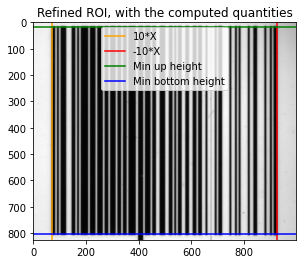

In [6]:
%%time
refine_roi(f'../images/{images_paths[0]}')

Wall time: 162 ms


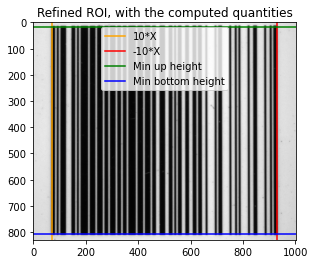

In [7]:
%%time
refine_roi(f'../images/{images_paths[1]}')

Wall time: 134 ms


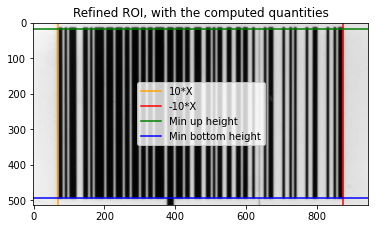

In [8]:
%%time
refine_roi(f'../images/{images_paths[2]}')

Wall time: 108 ms


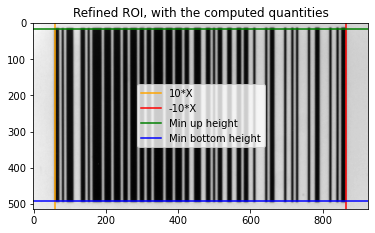

In [9]:
%%time
refine_roi(f'../images/{images_paths[3]}')

Wall time: 175 ms


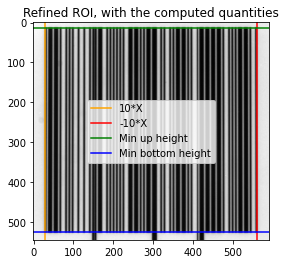

In [10]:
%%time
refine_roi(f'../images/{images_paths[4]}')

Wall time: 110 ms


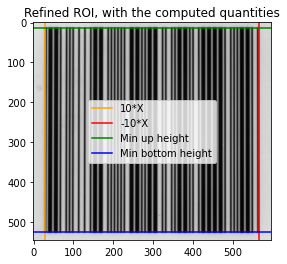

In [11]:
%%time
refine_roi(f'../images/{images_paths[5]}')

Wall time: 111 ms


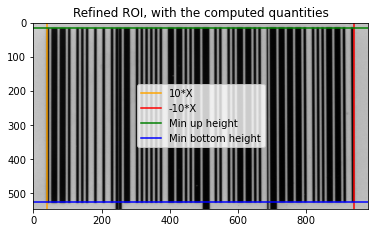

In [12]:
%%time
refine_roi(f'../images/{images_paths[6]}')

Wall time: 119 ms


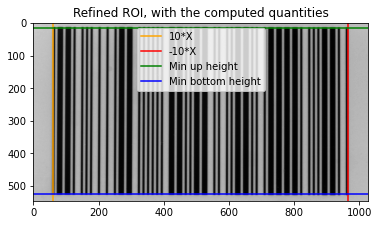

In [13]:
%%time
refine_roi(f'../images/{images_paths[7]}')

Wall time: 129 ms


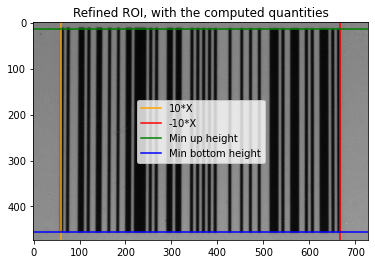

In [14]:
%%time
refine_roi(f'../images/{images_paths[8]}')

Wall time: 110 ms


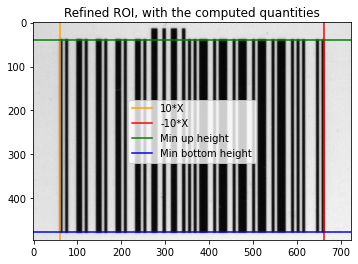

In [15]:
%%time
refine_roi(f'../images/{images_paths[9]}')

Wall time: 239 ms


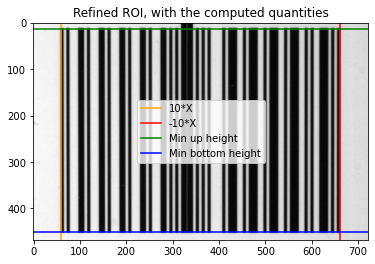

In [16]:
%%time
refine_roi(f'../images/{images_paths[10]}')

Wall time: 79.2 ms


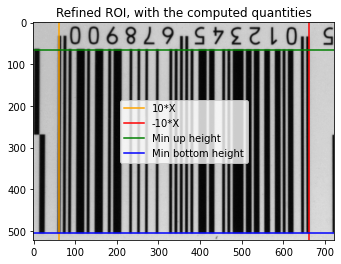

In [17]:
%%time
refine_roi(f'../images/{images_paths[11]}')

Wall time: 100 ms


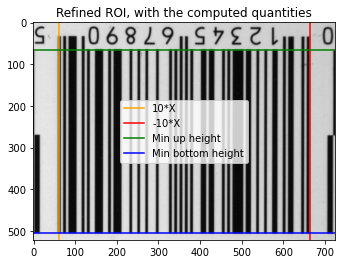

In [18]:
%%time
refine_roi(f'../images/{images_paths[12]}')

Wall time: 67.4 ms


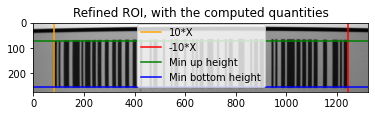

In [19]:
%%time
refine_roi(f'../images/{images_paths[13]}')

Wall time: 79.5 ms


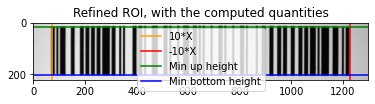

In [20]:
%%time
refine_roi(f'../images/{images_paths[14]}')

Wall time: 108 ms


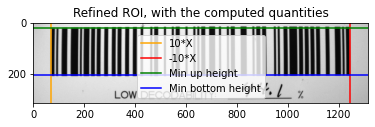

In [21]:
%%time
refine_roi(f'../images/{images_paths[15]}')

Wall time: 48 ms


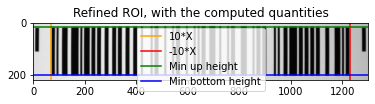

In [22]:
%%time
refine_roi(f'../images/{images_paths[16]}')

Wall time: 77.2 ms


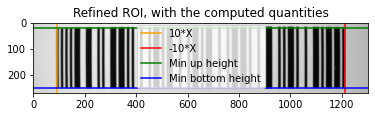

In [23]:
%%time
refine_roi(f'../images/{images_paths[17]}')

Wall time: 76.2 ms


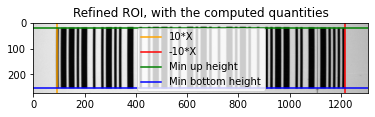

In [24]:
%%time
refine_roi(f'../images/{images_paths[18]}')

Wall time: 82.6 ms


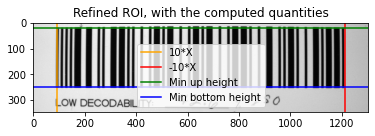

In [25]:
%%time
refine_roi(f'../images/{images_paths[19]}')

Wall time: 80.8 ms


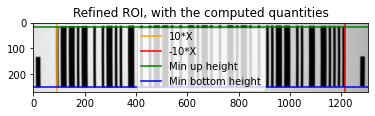

In [26]:
%%time
refine_roi(f'../images/{images_paths[20]}')

Wall time: 139 ms


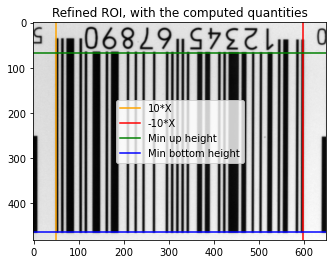

In [27]:
%%time
refine_roi(f'../images/{images_paths[22]}')

Wall time: 72.7 ms


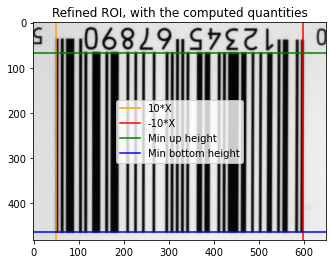

In [28]:
%%time
refine_roi(f'../images/{images_paths[23]}')

Wall time: 98.5 ms


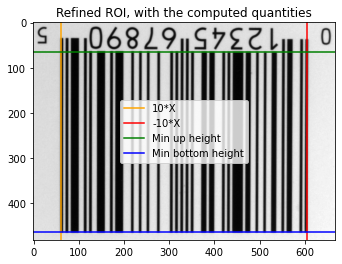

In [29]:
%%time
refine_roi(f'../images/{images_paths[24]}')

Wall time: 92.9 ms


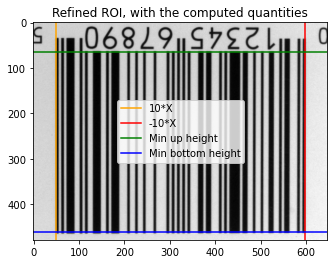

In [30]:
%%time
refine_roi(f'../images/{images_paths[25]}')

Wall time: 111 ms


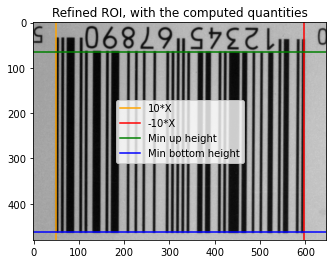

In [31]:
%%time
refine_roi(f'../images/{images_paths[26]}')

Wall time: 103 ms


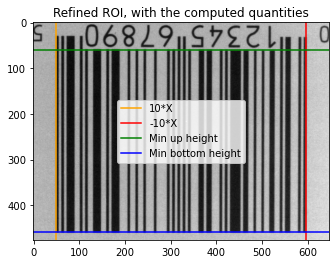

In [32]:
%%time
refine_roi(f'../images/{images_paths[27]}')

Wall time: 99.3 ms


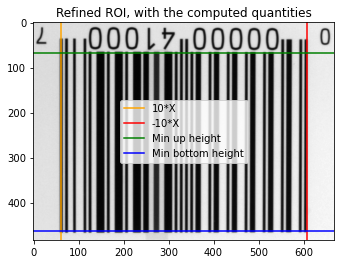

In [33]:
%%time
refine_roi(f'../images/{images_paths[28]}')

Wall time: 83.7 ms


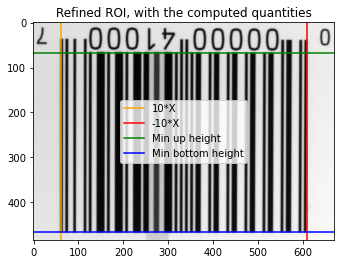

In [34]:
%%time
refine_roi(f'../images/{images_paths[29]}')

Wall time: 92 ms


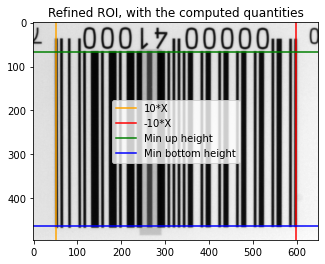

In [35]:
%%time
refine_roi(f'../images/{images_paths[30]}')

Wall time: 103 ms


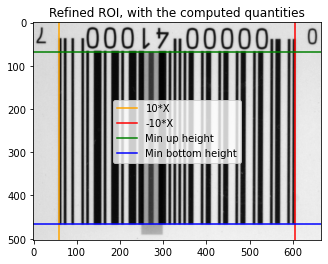

In [36]:
%%time
refine_roi(f'../images/{images_paths[31]}')

Wall time: 61.3 ms


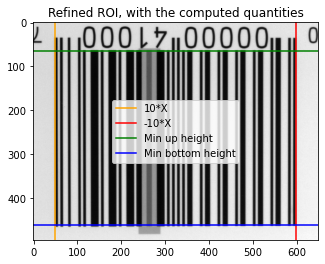

In [37]:
%%time
refine_roi(f'../images/{images_paths[32]}')

Wall time: 134 ms


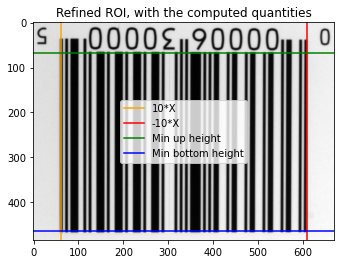

In [38]:
%%time
refine_roi(f'../images/{images_paths[33]}')

Wall time: 84.5 ms


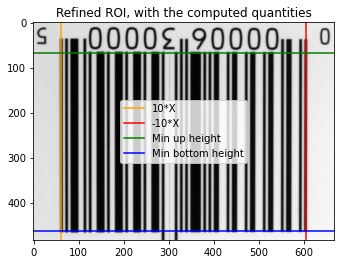

In [39]:
%%time
refine_roi(f'../images/{images_paths[34]}')

Wall time: 101 ms


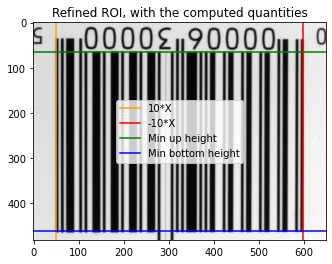

In [40]:
%%time
refine_roi(f'../images/{images_paths[35]}')

Wall time: 64.3 ms


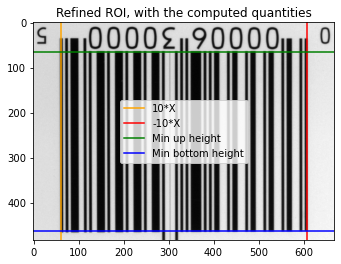

In [41]:
%%time
refine_roi(f'../images/{images_paths[36]}')

Wall time: 111 ms


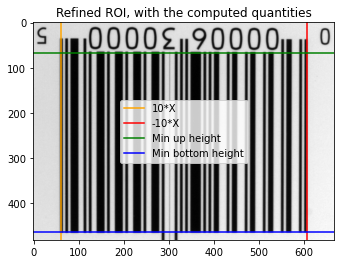

In [42]:
%%time
refine_roi(f'../images/{images_paths[37]}')

Wall time: 87.9 ms


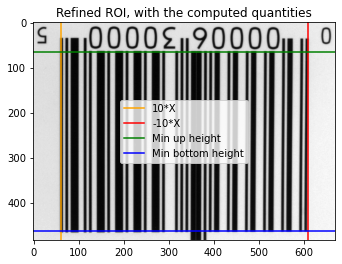

In [43]:
%%time
refine_roi(f'../images/{images_paths[38]}')

Wall time: 70.1 ms


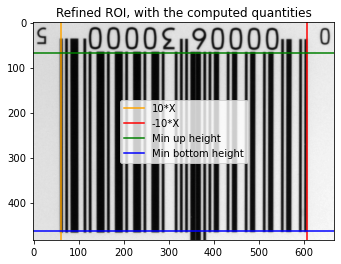

In [44]:
%%time
refine_roi(f'../images/{images_paths[39]}')

Wall time: 107 ms


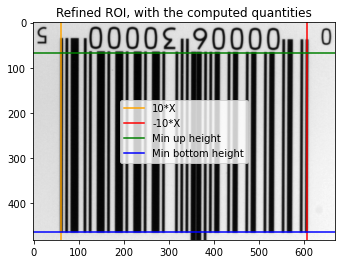

In [45]:
%%time
refine_roi(f'../images/{images_paths[40]}')

Wall time: 108 ms


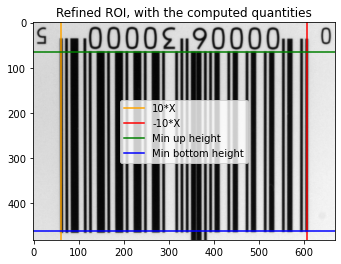

In [46]:
%%time
refine_roi(f'../images/{images_paths[41]}')

Wall time: 153 ms


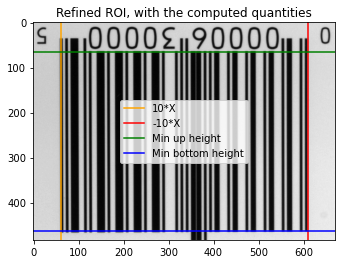

In [47]:
%%time
refine_roi(f'../images/{images_paths[42]}')

Wall time: 84.1 ms


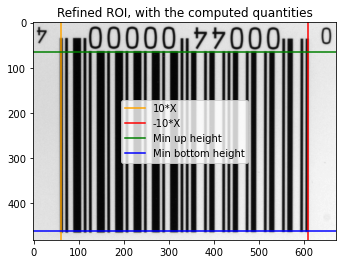

In [48]:
%%time
refine_roi(f'../images/{images_paths[43]}')

Wall time: 104 ms


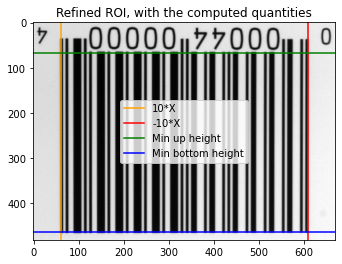

In [49]:
%%time
refine_roi(f'../images/{images_paths[44]}')

Wall time: 77.2 ms


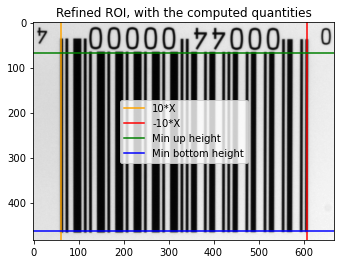

In [50]:
%%time
refine_roi(f'../images/{images_paths[45]}')

Wall time: 69.4 ms


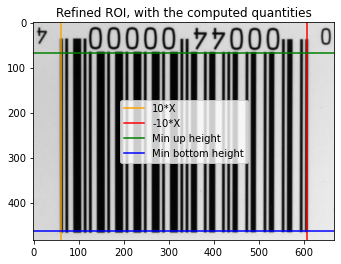

In [51]:
%%time
refine_roi(f'../images/{images_paths[46]}')

Wall time: 86.6 ms


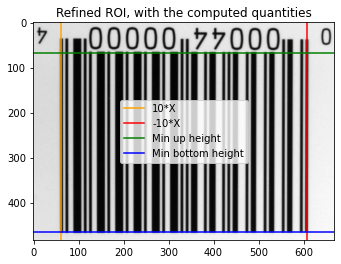

In [52]:
%%time
refine_roi(f'../images/{images_paths[47]}')

Wall time: 91.4 ms


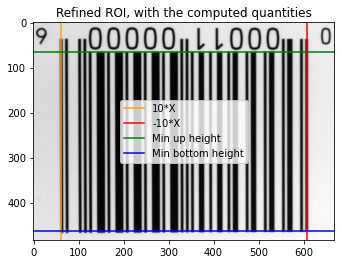

In [53]:
%%time
refine_roi(f'../images/{images_paths[48]}')

Wall time: 77.3 ms


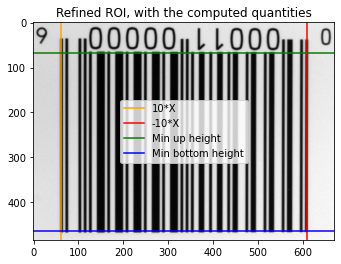

In [54]:
%%time
refine_roi(f'../images/{images_paths[49]}')

Wall time: 69.3 ms


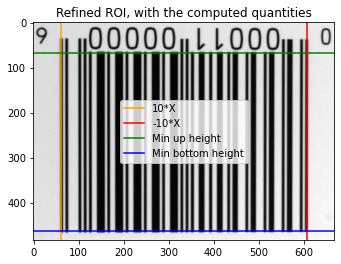

In [55]:
%%time
refine_roi(f'../images/{images_paths[50]}')

Wall time: 79.9 ms


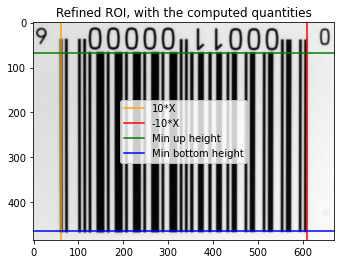

In [56]:
%%time
refine_roi(f'../images/{images_paths[51]}')

Wall time: 84.3 ms


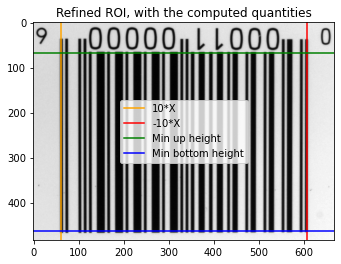

In [57]:
%%time
refine_roi(f'../images/{images_paths[52]}')

Wall time: 41.8 ms


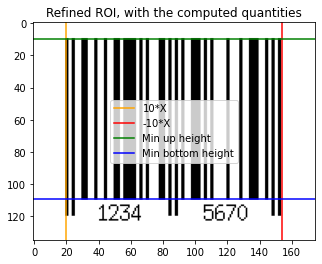

In [58]:
%%time
refine_roi(f'../other images/1.png')

Wall time: 178 ms


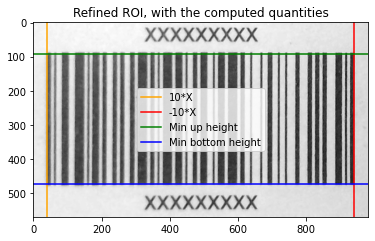

In [59]:
%%time
refine_roi(f'../other images/5.jpg')

Wall time: 97.2 ms


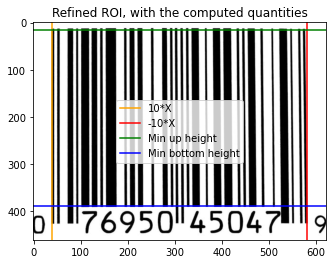

In [60]:
%%time
refine_roi(f'../other images/7.jpg')

Wall time: 40.2 ms


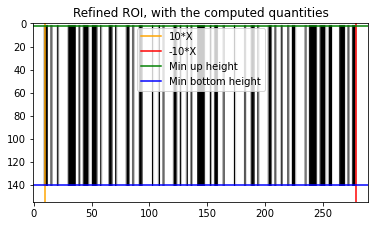

In [61]:
%%time
refine_roi(f'../other images/8.png')